* without finetuning Load the renet model and get feature and predict

In [ ]:

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
import numpy as np
from os import listdir, walk
from os.path import isfile, join
import itertools

# Function to get all file paths in a given directory
def getAllFilesInDirectory(directoryPath: str):
    """
    Returns a list of all file paths in a specified directory.
    """
    return [(directoryPath + "/" + f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

# Function to preprocess and predict a single image using the model
def predict(img_path : str, model: Model):
    """
    Loads, preprocesses, and extracts a feature vector from a single image.
    """
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

# Function to calculate the Euclidean distance between two feature vectors
def findDifference(f1, f2):
    """
    Calculates the Euclidean distance between two feature vectors.
    """
    return np.linalg.norm(f1-f2)

# Function to find the most similar image for each image in the directory
def findDifferences(feature_vectors):
    """
    Compares all feature vectors and finds the most similar pair for each image.
    """
    similar: dict = {}
    keys = [k for k,v in feature_vectors.items()]
    min_diff : dict = {}
    for k in keys:
        min_diff[k] = 10000000 # Initialize with a large number

    # Generate all unique pairs of images to compare
    possible_combinations=list(itertools.combinations(keys, 2))
    
    for k,v in possible_combinations:
        diff=findDifference(feature_vectors[k],feature_vectors[v])
        
        # Check if the current difference is the smallest found so far for key k
        if(diff < min_diff[k]):
            min_diff[k] = diff
            similar[k] = v
        
        # Check if the current difference is the smallest found so far for key v
        if(diff < min_diff[v]):
            min_diff[v] = diff
            similar[v] = k
    
    return similar

def driver():
    """
    Main function to drive the image similarity process.
    """
    feature_vectors: dict = {}
    # Load the ResNet50 model with pre-trained weights
    model = ResNet50(weights='imagenet')
    
    # -----------------------------------------------------------
    #  <--  THIS IS THE ONLY LINE YOU NEED TO CHANGE  -->
    # -----------------------------------------------------------
    # It currently looks for a folder named 'iris_images'
    # If you named your folder something else, change 'iris_images'
    # to your folder's name.
    
    # Iterate through all the image files in your new 'iris_images' folder
    for img_path in getAllFilesInDirectory("iris_images"):
        # For each image, generate its feature vector and store it
        feature_vectors[img_path] = predict(img_path,model)[0]

    # Find the most similar image for each one
    results=findDifferences(feature_vectors)
    
    # Print the results
    for k,v in results.items():
        print(k +" is most similar to: "+ v)

# Call the main function
driver()


In [11]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np
from os import listdir
from os.path import isfile, join
import itertools

# Function to get all file paths in a given directory
def getAllFilesInDirectory(directoryPath: str):
    """
    Returns a list of all file paths in a specified directory.
    """
    return [
        join(directoryPath, f)
        for f in listdir(directoryPath)
        if isfile(join(directoryPath, f))
    ]

# Function to preprocess and predict a single image using the model
def predict(img_path: str, model: Model):
    """
    Loads, preprocesses, and extracts a feature vector from a single image.
    Resizes image to 224x224 for ResNet50 input.
    """
    img = image.load_img(img_path, target_size=(224, 224), color_mode="rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

# Function to calculate the Euclidean distance between two feature vectors
def findDifference(f1, f2):
    """
    Calculates the Euclidean distance between two feature vectors.
    """
    return np.linalg.norm(f1 - f2)

# Function to find the most similar image for each image in the directory
def findDifferences(feature_vectors):
    """
    Compares all feature vectors and finds the most similar pair for each image.
    """
    similar: dict = {}
    keys = list(feature_vectors.keys())
    min_diff: dict = {k: float("inf") for k in keys}

    # Generate all unique pairs of images to compare
    possible_combinations = list(itertools.combinations(keys, 2))

    for k, v in possible_combinations:
        diff = findDifference(feature_vectors[k], feature_vectors[v])

        if diff < min_diff[k]:
            min_diff[k] = diff
            similar[k] = v

        if diff < min_diff[v]:
            min_diff[v] = diff
            similar[v] = k

    return similar

# Main driver function
def driver():
    """
    Main function to drive the image similarity process.
    """
    feature_vectors: dict = {}

    # Load the ResNet50 model with pre-trained weights
    model = ResNet50(weights='imagenet')

    # Change this to the path where your iris images are stored
    iris_folder = "african/image/0001_L"

    # Iterate through all the image files in the folder
    for img_path in getAllFilesInDirectory(iris_folder):
        feature_vectors[img_path] = predict(img_path, model)[0]

    # Find the most similar image for each one
    results = findDifferences(feature_vectors)

    # Print the results
    for k, v in results.items():
        print(f"{k} is most similar to: {v}")

# Call the main function
if __name__ == "__main__":
    driver()


I0000 00:00:1754907380.329365  488896 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21998 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
2025-08-11 15:46:20.584147: W external/local_xla/xla/service/gpu/llvm_gpu_backend/default/nvptx_libdevice_path.cc:41] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykernel_launcher.runfiles/cuda_nvdisasm
  ipykernel_launcher.runfiles/nvidia_nvshmem
  ipykern/cuda_nvcc
  ipykern/cuda_nvdisasm
  ipykern/nvidia_nvshmem
  
  /usr/local/cuda
  /opt/cuda
  /home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packag

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


2025-08-11 15:46:30.363380: I external/local_xla/xla/service/service.cc:163] XLA service 0x73afa8045240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-11 15:46:30.363396: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-08-11 15:46:30.395397: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-11 15:46:30.644824: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501
2025-08-11 15:46:31.190656: W external/local_xla/xla/service/gpu/llvm_gpu_backend/nvptx_backend.cc:110] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2025-08-11 15:46:31.195339: W tensorflow/core/framework/op_kernel.cc:1855] OP_REQUIRES failed at xla_ops.cc:590 : INTERNAL: libdevice not found at ./libdevice.10.bc
20

InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/asyncio/base_events.py", line 683, in run_forever

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/asyncio/base_events.py", line 2042, in _run_once

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/asyncio/events.py", line 89, in _run

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_488896/3349991616.py", line 90, in <module>

  File "/tmp/ipykernel_488896/3349991616.py", line 79, in driver

  File "/tmp/ipykernel_488896/3349991616.py", line 30, in predict

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 566, in predict

  File "/home/nishkal/anaconda3/envs/alam/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 260, in one_step_on_data_distributed

libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_5096]

(640, 1088, 3)

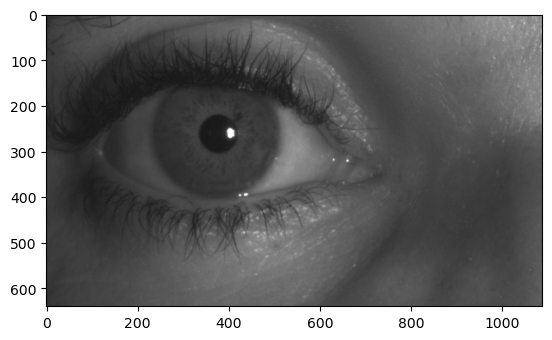

In [10]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("african/image/0001_L/0001_L_001.png")
plt.imshow(img)
img.shape